## Preliminary Thermal Circuits
### ME144 Final Project

In [70]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts
import schemdraw as schem
import schemdraw.elements as e
import math
from Libraries import HT_thermal_resistance as res

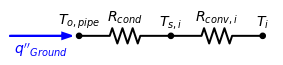

In [71]:
R = []

R.append(res.Resistance(name="$R_{conv,i}$", units="W/m"))
R.append(res.Resistance(name="$R_{cond}$", units="W/m"))
R.append(res.Resistance(name="$R_{conv,o}$", units="W/m"))
R.append(res.Resistance(name="$R_{rad}$", units="W/m"))

#Thermal circuit of fluid when colder than the ground
d = schem.Drawing()
d.add(e.DOT, label = r"$T_{o,pipe}$")
d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = R[0].name)
d.add(e.DOT, label = r"$T_{i}$")

L1 = d.add(e.LINE, botlabel = "$q''_{Ground}$", endpts = [[-2.25, 0], [-0.25, 0]], color = 'blue')
d.labelI(L1, arrowofst = 0, color = 'blue')


d.draw()

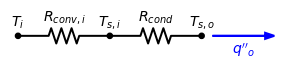

In [72]:
#Thermal circuit of fluid when warmer than ground
d = schem.Drawing()
d.add(e.DOT, label = r"$T_{i}$")
d.add(e.RES, d = 'right', label = R[0].name)
d.add(e.DOT, label = r"$T_{s,i}$")
R1 = d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.DOT, label = r"$T_{s,o}$")

L1 = d.add(e.LINE, botlabel = "$q''_{o}$", endpts = [[7, 0], [7.75, 0]], color = 'blue')
d.labelI(L1, arrowofst = 0, color = 'blue')

d.draw()

### Partially Buried Snow Pile

* $T_{snow} = 0^oC$
* At 6 ft, Ground Temp = Constant
$$
q'' = \frac{k}{L}\cdot \Delta T
$$

$$
q''_{soil} = k_{soil} \cdot \frac{T_{6 ft} - T_{snow/soil}}{6 ft}
$$



### Governing Equation for Snow Melt in Pile

$$
\rho_{snow} \cdot h_{L,snow} \cdot \frac{dh}{dt} = - \Sigma q''_{outside} + q''_{inside}
$$

The bulk of the snow pile is $0^oC$, therefore $\vec{\Delta} T = 0$ inside the snow pile resulting in


$$
\vec{q}_{inside} = -h_{snow} \cdot \vec{\Delta}T = 0
$$
Reducing the equation above yields:
$$
\rho_{snow} \cdot h_{L,snow} \cdot \frac{dh}{dt} = - \Sigma q''_{outside}
$$

$$
\frac{dV}{dt} = \frac{1}{\rho_{snow}\cdot h_{L,snow}} \cdot (\Sigma q_{in})
$$

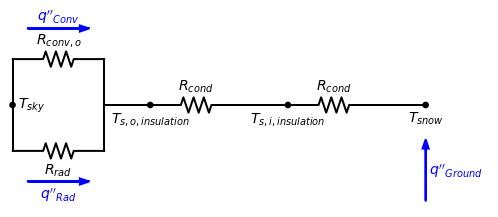

In [73]:
#Thermal circuit of snow pile
d = schem.Drawing()

d.add(e.DOT, rgtlabel = r"$T_{sky}$")
d.push()
d.add(e.LINE, d= 'up', l = 1.5)
d.add(e.RES, d='right', label = R[2].name)
d.add(e.LINE, d='down', l = 1.5)
d.pop()
d.add(e.LINE, d='down', l = 1.5)
d.add(e.RES, d='right', botlabel = R[3].name)
d.add(e.LINE, d= 'up', l = 1.5)
d.add(e.LINE,d='right',l=1.5)
d.add(e.DOT, botlabel="$T_{s,o,insulation}}$")

d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.LINE,d='right',l=1.5)
d.add(e.DOT, botlabel="$T_{s,i,insulation}}$")

d.add(e.RES, d = 'right', label = R[1].name)
d.add(e.LINE,d='right',l=1.5)
d.add(e.DOT, botlabel="$T_{snow}}$")

L1 = d.add(e.LINE, botlabel = "$q''_{Ground}$", endpts = [[13.5, -3], [13.5, -1.25]], color = 'blue')
d.labelI(L1, arrowofst = 0, color = 'blue')
L2 = d.add(e.LINE, toplabel = "$q''_{Conv}$", endpts = [[.5, 2.5], [2.5, 2.5]], color = 'blue')
d.labelI(L2, arrowofst = 0, color = 'blue')
L3 = d.add(e.LINE, botlabel = "$q''_{Rad}$", endpts = [[.5, -2.5], [2.5, -2.5]], color = 'blue')
d.labelI(L3, arrowofst = 0, color = 'blue')

d.draw()

## Building

### Assumptions
* Within the building, heat transfer from air, through pipe wall, and into cold fluid is negligable.
* Within the building, heat transfer from warm fluid, through pipe wall, and into cool room air is negligable.


## Phase Change and Snow Melting
The phenomenon of phase change, here solid to liquid, is flux driven. For melting to occur, the surface must be at or above the melting temperature of the material. this is a necessary but not sufficient condition. Each phase change absorbs an energy called latent heat. Think of it, in our own case, as the energy used to melt the snow. For our problem, this energy is the sum of all the incoming heat rates from the surfaces of the snow pile exposed to heat sources (atmosphere, soil, pipes)

## Equation of Volume Loss
Consider the volume v(t)
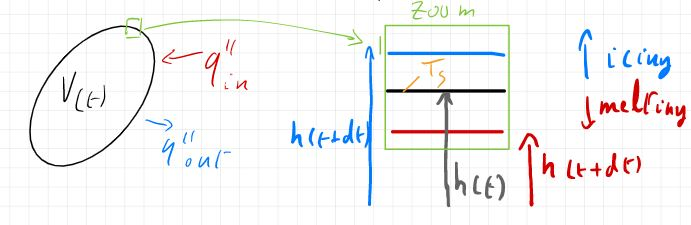
The surface of the solid experiences heat fluxes entering (in) or exiting (out). At local level, if $T_s$, the surface temperature, is equal to $T_{melt}$ and the heat rate warming the solid is cooler than the heat cooling heat rate $(q''_{in} > q''_{out})$, the surface recedes over time, causing mass loss (and volume loss) of the solid phase. The surface and volume grow when $(q''_{out}>q''_{in})$ and $(T_s=T_{melt})$

### Stefan Problem

$$
\rho_s h_{L,s}\frac{dh}{dt} = q''_{out}-q''_{in} if T_s = T_{melt}
$$
In the case of the snow pile, the snow is assumed to be at $0^oC$ throughout, $q''_{out} = 0$ Integrating over ALL the surfaces of the snow pile/interfaces with wood chips, soil to pipes leads to the volume loss equation

$$
\rho_sh_{L,s}\frac{dV}{dt} = -\Sigma q''_iA_i
$$

where $\rho_s$ and $h_{L,s}$ are the snow density and latent heat roughly $(334 \frac{kg}{kg})$, V the volume, $q''_1$ in the heat flux through the surface i of area $A_i$, or
$$
\frac{dV}{dt} = f(t) = -\frac{1}{\rho_sh_{L,s}} \Sigma_iq''_iA_i
$$

## Flow Chart of the Project
1. Calculate the cooling demand as a function of time based on your simplified building $q_{cool}(t)$
2. Using an efficiency coefficient $\eta_{HE} = 0.8$ for the heat exchanger, design the piping necessary to extract $\frac{1}{\eta_{HE}}man (Q_{cool}(t))$ from the snow pile.
Assume that the heat exchanger is against the building, 50m away from the snow pile. The large number of variables requires that you find the inlet and outlet temperatures of the heat exchanger on the snow pile side (you don't have to worry about the building side, you have the cooling demand from step 1), the diameter of pipes, then thickness and material and possible insulation between the pipe and soil. Note that your choice of cooling process determines your constraints.
* Using a close loop of forced are requires the determination of the flow rate and lenght of pipes (thhink manifold) necessary to achive peak cooling demand.
* Using the melt water requires that the mass rate of runoff corresponds to the melt caused by the peak cooling energy demand.
3. Assuming zero lab between cooling demand from the building and delivery from the snow pile (unrealistic), compute the evolution of the snow pile volume using Stefan's problem and $q_{cool}(t)$
4. Use your code to make a recommendation for the snow pile's volume necessary to cool your building.

## Recomendations
* Sketch thermal circuits
* Clearly identify equations and unknows
* Keep in simple: Assume that the surface area at the interface snow/wood chips is constant and that the thickness of the wood chips is constant.
* Assume that the ground temperature is constant at 1m away from any surface.